<a href="https://colab.research.google.com/gist/ruvnet/6e66626a665728c27bf6140b3ba24b98#file-introduction-to-mixture-of-experts-moe-model-tutorial-ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Mixture of Experts (MoE) Model Tutorial
(c)reated by [@rUv
](https://twitter.com/ruv), cause i could.

The Mixture of Experts (MoE) model represents a sophisticated approach in machine learning, aiming to harness the collective intelligence of multiple specialized models, termed "experts," to tackle complex tasks more efficiently than monolithic models. By dynamically routing inputs to the most relevant experts based on the context, MoE models can adapt to a wide range of scenarios, offering both flexibility and scalability.

### What is MoE?

At its core, an MoE model comprises two primary components: a gating network and a set of expert networks. The gating network, responsible for decision-making, evaluates each input and determines which expert(s) should process it. This decision is based on the input's characteristics and the expertise of each network, enabling a targeted approach to problem-solving. The expert networks, each trained on a specific subset of the problem domain, specialize in handling particular types of inputs.

### How is MoE Built?

Building an MoE model involves defining the expert networks, the gating mechanism, and the training process that allows both components to learn their roles effectively. Experts are usually smaller neural networks optimized for specific tasks, while the gating network is a classifier that learns to assign inputs to the right experts. Training an MoE model is more complex than training a standard model, as it requires simultaneous optimization of the experts for their respective tasks and the gating network to accurately route inputs.

### Why is MoE Important?

The MoE architecture addresses several limitations of traditional deep learning models, including scalability, adaptability, and efficiency. By dividing the problem space into smaller, manageable segments, MoE models can provide more nuanced responses to diverse inputs, improve computational efficiency by activating only relevant experts for each input, and scale more gracefully by adding more experts without significantly increasing the burden on the gating mechanism.

## Introduction to Mixture of Experts (MoE) Model Tutorial

In this tutorial, we will explore the concept and application of the Mixture of Experts (MoE) model, an advanced technique in machine learning that optimizes the process of decision-making by routing different inputs to the most relevant expert networks. Unlike traditional neural networks that rely on a single architecture to process all inputs, MoE models consist of multiple specialized sub-models (experts) and a gating network. The gating network's role is to analyze each input and decide which expert(s) should handle it, based on their specialization. This methodology allows for a more efficient and scalable approach to handling diverse and complex datasets, significantly improving model performance and adaptability.

By using a Jupyter notebook interface, this tutorial will guide you through the process of setting up, configuring, and simulating an MoE model. This hands-on approach aims to provide a deeper understanding of MoE models, their importance in the AI field, and how they can be used to solve real-world problems more effectively.

## UI Code Explanation
Lets start by creating a UI for managing the process.

In [ ]:
# ipywidgets: Provides interactive HTML widgets for Jupyter notebooks to create user interface elements such as dropdowns, sliders, and buttons.
import ipywidgets as widgets

# IPython.display: Allows the output of display items like HTML, JSON, PNG, etc., within the Jupyter notebook interface.
from IPython.display import display, clear_output

# torch: A deep learning library that provides a wide range of algorithms for machine learning and artificial intelligence.
import torch

# torch.nn.functional: Contains functions for building neural networks, such as activation functions, loss calculations, and convolution operations.
import torch.nn.functional as F

### Step 1: UI:  Select Features for Routing

The initial step in configuring a Mixture of Experts (MoE) model involves selecting the specific features that will guide the gating network in routing inputs to the most appropriate expert networks. The choice of features is critical, as it directly influences the efficiency and effectiveness of the model. Each feature type offers unique insights, depending on the nature of the input data and the problem being addressed:

- **Word Embeddings (NLP):** These are dense representations of words in a continuous vector space, capturing semantic meanings. Ideal for text analysis and natural language processing tasks, word embeddings enable the model to understand contextual relationships between words.

- **Pixel Intensity (Image):** This feature type involves analyzing the intensity values of pixels in images. It's fundamental for image processing tasks, enabling the model to recognize patterns based on the variation in lightness or color.

- **Categorical Encoding (Tabular):** For tabular data, categorical encoding transforms categorical variables into numerical values, making it easier for the model to process and analyze data with non-numeric features.

- **Sentence Embeddings (NLP):** Similar to word embeddings but for whole sentences or paragraphs, these embeddings capture the contextual meaning of longer text segments. They're crucial for tasks requiring an understanding of sentence structure and meaning.

- **Edge Detection Features (Image):** This involves identifying the boundaries within images, which is vital for recognizing objects and their shapes. Edge detection enhances the model's ability to interpret visual data by highlighting structural information.

By selecting the appropriate features for routing, users can tailor the MoE model to their specific dataset and problem, optimizing the model's performance.


In [ ]:
import ipywidgets as widgets
from IPython.display import display

# Define the feature selection widget for interactive feature selection.
# This widget allows users to select one or multiple features from a predefined list,
# enabling dynamic configuration of the gating network's routing criteria.
feature_selection_widget = widgets.SelectMultiple(
    options=[
        'Word Embeddings (NLP)',
        'Pixel Intensity (Image)',
        'Categorical Encoding (Tabular)',
        'Sentence Embeddings (NLP)',
        'Edge Detection Features (Image)'
    ],
    description='Features for Routing:',  # Text displayed next to the widget.
    disabled=False,  # Ensures that the widget is interactive and users can make selections.
    style={'description_width': 'initial'}  # Adjusts the description's width for better readability.
)

# Display the widget in the Jupyter notebook, allowing users to interact with it
# and select the desired features for routing.
display(feature_selection_widget)

SelectMultiple(description='Features for Routing:', options=('Word Embeddings (NLP)', 'Pixel Intensity (Image)…

### Step 2: UI: Configure Model Architecture

Specify the architectures for the expert networks and gating network. Also set the capacity utilization and sparsity control parameters.

- **Expert Architecture:** The neural network architecture used for each expert (e.g. MLP, CNN, Transformer)
- **Gating Network Architecture:** The architecture of the gating network that routes inputs (e.g. MLP, Transformer)
- **Expert Capacity Utilization:** The maximum fraction of tokens that can be routed to each expert
- **Sparsity Control:** Method to encourage sparsity in expert routing (e.g. entropy regularization)

In [ ]:
import ipywidgets as widgets
from IPython.display import display

# Dropdown widget for selecting the architecture of the expert networks.
# Offers a choice among several common neural network architectures.
expert_architecture_widget = widgets.Dropdown(
    options=['MLP', 'CNN', 'Transformer'],  # Available architectures
    value='MLP',  # Default selection
    description='Expert Architecture:',  # Label for the dropdown
    style={'description_width': 'initial'}  # Ensure the description text does not get cut off
)

# Dropdown widget for selecting the architecture of the gating network.
# Similar to the expert architecture, but the choices are tailored to the gating network's role.
gating_network_architecture_widget = widgets.Dropdown(
    options=['MLP', 'Transformer'],  # Available architectures for the gating network
    value='MLP',  # Default selection
    description='Gating Network Architecture:',  # Label for the dropdown
    style={'description_width': 'initial'}  # Ensure the description text does not get cut off
)

# Slider widget for adjusting the capacity utilization of the experts.
# Allows fine-tuning how much of each expert's capacity is utilized, affecting model efficiency and resource allocation.
capacity_utilization_widget = widgets.FloatSlider(
    value=0.5,  # Initial value set to 50%
    min=0,  # Minimum value
    max=1.0,  # Maximum value (100% utilization)
    step=0.1,  # Increment steps
    description='Expert Capacity Utilization:',  # Label for the slider
    style={'description_width': 'initial'}  # Ensure the description text does not get cut off
)

# Dropdown widget for selecting the method of sparsity control in expert routing.
# Sparsity control is crucial for ensuring that not all experts are utilized for every input, enhancing model efficiency.
sparsity_control_widget = widgets.Dropdown(
    options=['Entropy Regularization', 'L1 Regularization'],  # Available sparsity control methods
    value='Entropy Regularization',  # Default selection
    description='Sparsity Control:',  # Label for the dropdown
    style={'description_width': 'initial'}  # Ensure the description text does not get cut off
)

# Displaying the UI elements related to model architecture, capacity utilization, and sparsity control.
# These widgets allow users to customize the structural and operational aspects of the MoE model.
display(expert_architecture_widget, gating_network_architecture_widget, capacity_utilization_widget, sparsity_control_widget)

Dropdown(description='Expert Architecture:', options=('MLP', 'CNN', 'Transformer'), style=DescriptionStyle(des…

Dropdown(description='Gating Network Architecture:', options=('MLP', 'Transformer'), style=DescriptionStyle(de…

FloatSlider(value=0.5, description='Expert Capacity Utilization:', max=1.0, style=SliderStyle(description_widt…

Dropdown(description='Sparsity Control:', options=('Entropy Regularization', 'L1 Regularization'), style=Descr…

### Step 3: UI: Set Training Hyperparameters

Training hyperparameters are critical settings that can significantly affect the performance and efficiency of a machine learning model. In the context of a Mixture of Experts (MoE) model, these parameters guide the training process, impacting how quickly and effectively the model learns from the data. Adjusting these parameters allows for fine-tuning the model's behavior and performance:

- **Learning Rate:** This parameter controls the size of the steps the model takes during optimization. A smaller learning rate might lead to more precise convergence but can slow down the training process. Conversely, a larger learning rate can speed up training but might overshoot the optimal solution.

- **Batch Size:** The number of training examples used in one iteration of model training. Smaller batch sizes can lead to a more stable convergence by providing more frequent updates, while larger batch sizes benefit from faster computation by leveraging vectorized operations.

- **Loss Function:** This function measures the difference between the model's predictions and the actual target values. The choice of loss function depends on the specific task (e.g., classification, regression) and can significantly influence the model's learning behavior.

- **Routing Strategy Exploration:** In an MoE model, this refers to the method used by the gating network to explore and exploit the expertise of different experts during training. For example, an epsilon-greedy strategy balances between choosing the currently best-performing expert and exploring other experts to find potentially better routes for specific inputs.

- **Evaluation Metrics:** These metrics assess the model's performance on specific tasks, such as Accuracy, F1-Score, or BLEU. Choosing the right metric is crucial for understanding the model's effectiveness in addressing the problem at hand.

Here's how you can configure these hyperparameters in Python using ipywidgets for an interactive and intuitive model setup process:


In [ ]:
import ipywidgets as widgets
from IPython.display import display

# Widget for selecting the learning rate using a logarithmic slider.
# This allows for a wide range of learning rate values to be easily selected, from very small to relatively large.
learning_rate_widget = widgets.FloatLogSlider(
    value=-3,  # Initial value (10^(-3) = 0.001)
    base=10,  # Logarithmic base
    min=-6,  # Minimum exponent
    max=0,  # Maximum exponent
    step=0.1,  # Step size for the slider
    description='Learning Rate:',  # Label for the slider
    style={'description_width': 'initial'}  # Ensure the description text does not get cut off
)

# Widget for selecting the batch size with an integer slider.
# Provides a simple way for users to select an appropriate batch size for model training.
batch_size_widget = widgets.IntSlider(
    min=1,  # Minimum batch size
    max=1024,  # Maximum batch size
    value=128,  # Default batch size
    step=1,  # Step size for the slider
    description='Batch Size:',  # Label for the slider
    style={'description_width': 'initial'}  # Ensure the description text does not get cut off
)

# Widget for choosing the loss function from a dropdown list.
# This dropdown allows users to select the loss function that best matches their training objectives.
loss_function_widget = widgets.Dropdown(
    options=['Cross Entropy', 'Mean Squared Error', 'KL Divergence'],  # Available loss functions
    value='Cross Entropy',  # Default loss function
    description='Loss Function:',  # Label for the dropdown
    style={'description_width': 'initial'}  # Ensure the description text does not get cut off
)

# Widget for selecting the routing strategy exploration method.
# This dropdown enables users to choose how the model should explore and exploit different experts during training.
routing_strategy_exploration_widget = widgets.Dropdown(
    options=['Epsilon-Greedy', 'Boltzmann Exploration'],  # Available strategies
    value='Epsilon-Greedy',  # Default strategy
    description='Routing Strategy Exploration:',  # Label for the dropdown
    style={'description_width': 'initial'}  # Ensure the description text does not get cut off
)

# Widget for selecting multiple evaluation metrics.
# This multi-select widget allows users to choose one or more metrics to evaluate the model's performance.
evaluation_metrics_widget = widgets.SelectMultiple(
    options=['Accuracy', 'F1-Score', 'BLEU', 'Perplexity'],  # Available metrics
    value=['Accuracy'],  # Default metrics
    description='Evaluation Metrics:',  # Label for the multi-select
    style={'description_width': 'initial'}  # Ensure the description text does not get cut off
)

# Grouping the hyperparameter widgets into a vertical box (VBox) layout for tidy display.
training_hyperparameters_widget = widgets.VBox([
    learning_rate_widget,
    batch_size_widget
])

# Display all UI elements related to training hyperparameters, loss function, routing strategy, and evaluation metrics.
display(training_hyperparameters_widget, loss_function_widget, routing_strategy_exploration_widget, evaluation_metrics_widget)


Dropdown(description='Loss Function:', options=('Cross Entropy', 'Mean Squared Error', 'KL Divergence'), style…

Dropdown(description='Routing Strategy Exploration:', options=('Epsilon-Greedy', 'Boltzmann Exploration'), sty…

SelectMultiple(description='Evaluation Metrics:', index=(0,), options=('Accuracy', 'F1-Score', 'BLEU', 'Perple…

### Step 4: Run MoE Model Simulation

The UI step in this tutorial involves simulating the configured Mixture of Experts (MoE) model.

This simulation aims to demonstrate how the selected settings and configurations would operate in a real-world scenario. By initiating this simulation, users can gain insights into the potential performance and behavior of their MoE model without the need for extensive computational resources or actual model deployment. This step is crucial for validating the effectiveness of the chosen configurations, including:

- **Expert and Gating Network Architectures:** The architectural choices for both the experts and the gating network, which play a significant role in determining the model's ability to handle various types of input data efficiently.

- **Routing Features:** The features selected for guiding the gating network's routing decisions, impacting how well the model can leverage the specialized knowledge of each expert.

- **Capacity Utilization and Sparsity Settings:** These settings influence the model's scalability and efficiency, affecting how inputs are distributed among experts and how resource utilization is optimized.

- **Training Hyperparameters:** The hyperparameters set in the previous step, including learning rate, batch size, and loss function, which dictate the training dynamics of the model.

- **Evaluation Metrics:** The metrics chosen to assess the model's performance, providing quantitative feedback on its accuracy, precision, and other critical aspects.

To initiate the MoE model simulation, a "Simulate Advanced Setup" button is provided. When clicked, this button triggers a function that simulates the MoE model configuration process and outputs a detailed report.

### Below is the Python code to create this interactive UI and its associated action:

In [ ]:
import torch
import torch.nn.functional as F
from IPython.display import clear_output

# Assuming the definitions of Expert, GatingNetwork, and other necessary imports and variables are already in place.

# Update the training model function to use settings from the UI
def simulate_advanced_setup(btn):
    with output_area_advanced:  # Direct all print statements and outputs to the output widget.
        clear_output()  # Clear the output area to ensure that only the latest simulation results are displayed.

        # Print a header and the chosen configurations for the MoE model setup.
        print("Simulating Advanced MoE Model Setup with Configuration based on UI settings:")
        print(f"- Expert Architecture: {expert_architecture_widget.value}")  # Display the selected expert architecture.
        print(f"- Gating Network Architecture: {gating_network_architecture_widget.value}")  # Display the selected gating network architecture.
        print(f"- Expert Capacity Utilization: {capacity_utilization_widget.value}")  # Display the expert capacity utilization setting.
        print(f"- Sparsity Control: {sparsity_control_widget.value}")  # Display the selected sparsity control method.

        # Extract values from the training hyperparameters UI widget
        learning_rate = training_hyperparameters_widget.children[0].value
        batch_size = training_hyperparameters_widget.children[1].value
        print(f"- Learning Rate: {learning_rate}")
        print(f"- Batch Size: {batch_size}")

        print(f"- Loss Function: {loss_function_widget.value}")  # Display the selected loss function.
        print(f"- Routing Strategy Exploration: {routing_strategy_exploration_widget.value}")  # Display the routing strategy exploration method.
        print(f"- Evaluation Metrics: {', '.join(evaluation_metrics_widget.value)}")  # Display the selected evaluation metrics.

        # Here you would include your model simulation logic based on the extracted UI settings
        # Since this is a simulation, we'll just print a placeholder for the simulation logic
        print("\n[Placeholder for MoE model simulation logic based on the above settings]")

        # Conclude the simulation with a success message
        print("\nMoE Model Simulation Completed Successfully. Integration of these components in an actual MoE model offers exciting possibilities for handling diverse and complex datasets effectively.")

# Register the function to be called when the simulate button is clicked.
simulate_advanced_btn.on_click(simulate_advanced_setup)

# Display the UI elements in the notebook.
display(ui_elements)


# Training a Mixture of Experts Model with PyTorch

In this section, we dig into the practical aspects of building and training a Mixture of Experts (MoE) model using PyTorch. The MoE model is a powerful architecture for tackling complex machine learning problems by dividing them into simpler, manageable tasks that individual experts can solve. This approach allows for specialization among the experts, potentially leading to improved model performance on diverse datasets.

#### Key Components of the MoE Model:

- **Expert Networks**: Each expert is a neural network that specializes in learning from a subset of the data. Experts are trained to become adept at handling specific patterns or features within the data.

- **Gating Network**: The gating network acts as the decision-maker that routes inputs to the most appropriate experts based on their specialties. It learns to assign probabilities to each expert, indicating how likely an expert is to produce the correct output for a given input.

#### Objectives of This Section:

1. **Define the Expert and Gating Networks**: We start by outlining the architectures for both the expert networks and the gating network. These components are crucial for the MoE model's functionality.

2. **Custom Loss Function**: Incorporate a custom loss function to tailor the training process. This function can include terms that encourage balanced utilization across experts and penalize over-reliance on specific experts.

3. **Training Process**: Detail the steps involved in training the MoE model, including forward and backward passes, loss computation, and parameter updates. The training loop is designed to optimize both the expert and gating network parameters in harmony.

4. **Simulation and Output Analysis**: After training, we simulate the model's output on a batch of inputs to evaluate its performance. This step provides insights into the model's decision-making process and the effectiveness of the routing mechanism.

By the end of this section, you'll have a clear understanding of how to implement and train an MoE model using PyTorch, equipped with the knowledge to customize the model for specific tasks or datasets.


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Generate a synthetic dataset for demonstration purposes
inputs = torch.randn(num_samples, input_size)  # Randomly generated inputs
targets = torch.randint(0, output_size, (num_samples,))  # Random targets for a classification task

# Wrap the inputs and targets into a TensorDataset and DataLoader for batch processing
dataset = TensorDataset(inputs, targets)
train_loader = DataLoader(dataset, batch_size=10, shuffle=True)

class Expert(nn.Module):
    """Defines an individual expert network within the MoE model."""
    def __init__(self, input_size, output_size):
        super(Expert, self).__init__()
        self.layer1 = nn.Linear(input_size, 100)  # First linear layer
        self.layer2 = nn.Linear(100, output_size)  # Second linear layer to output predictions

    def forward(self, x):
        x = F.relu(self.layer1(x))  # Apply ReLU activation function
        x = self.layer2(x)  # Output layer
        return x

class GatingNetwork(nn.Module):
    """Defines the gating network responsible for routing inputs to the appropriate experts."""
    def __init__(self, input_size, num_experts):
        super(GatingNetwork, self).__init__()
        self.layer = nn.Linear(input_size, num_experts)  # Linear layer outputs a score for each expert

    def forward(self, x):
        x = F.softmax(self.layer(x), dim=1)  # Apply softmax to get probabilities for each expert
        return x

def train_model(model, gating_network, experts, optimizer, criterion, epochs, train_loader):
    """Training loop for the MoE model."""
    model.train()  # Set the model to training mode
    for epoch in range(epochs):
        for inputs, targets in train_loader:
            optimizer.zero_grad()  # Clear previous gradients

            # Route inputs through the gating network
            gate_outputs = gating_network(inputs)
            # Compute the outputs from all experts for each input
            expert_outputs = torch.stack([expert(inputs) for expert in experts], dim=1)
            # Weighted sum of expert outputs based on gating network's probabilities
            outputs = torch.sum(gate_outputs.unsqueeze(2) * expert_outputs, dim=1)

            # Compute the loss
            loss = criterion(outputs, targets)
            loss.backward()  # Backpropagation
            optimizer.step()  # Update model parameters

            print(f'Epoch {epoch+1}, Loss: {loss.item()}')

# Assuming input_size, output_size, num_samples, and num_experts are defined
input_size, output_size, num_samples, num_experts = 10, 2, 100, 3  # Example values

# Instantiate the gating network and a list of expert networks
gating_network = GatingNetwork(input_size, num_experts)
experts = [Expert(input_size, output_size) for _ in range(num_experts)]
model = nn.ModuleList([gating_network] + experts)  # Combine for parameter optimization

# Set up the optimizer and loss function
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Learning rate can be adjusted
criterion = nn.CrossEntropyLoss()  # Appropriate for classification tasks

# Run the training process
train_model(model, gating_network, experts, optimizer, criterion, epochs=10, train_loader=train_loader)

print("Training Completed Successfully.")


Epoch 1, Loss: 0.7154442071914673
Epoch 1, Loss: 0.7338322401046753
Epoch 1, Loss: 0.7161825895309448
Epoch 1, Loss: 0.6887787580490112
Epoch 1, Loss: 0.7278720140457153
Epoch 1, Loss: 0.6750345230102539
Epoch 1, Loss: 0.7482714056968689
Epoch 1, Loss: 0.738476574420929
Epoch 1, Loss: 0.6444841027259827
Epoch 1, Loss: 0.6920450925827026
Epoch 2, Loss: 0.7232067584991455
Epoch 2, Loss: 0.6814959049224854
Epoch 2, Loss: 0.7037976980209351
Epoch 2, Loss: 0.6731038689613342
Epoch 2, Loss: 0.6881388425827026
Epoch 2, Loss: 0.6562379002571106
Epoch 2, Loss: 0.6320157647132874
Epoch 2, Loss: 0.6683099865913391
Epoch 2, Loss: 0.6959301829338074
Epoch 2, Loss: 0.6860910654067993
Epoch 3, Loss: 0.615494966506958
Epoch 3, Loss: 0.6485785841941833
Epoch 3, Loss: 0.709912896156311
Epoch 3, Loss: 0.6975162029266357
Epoch 3, Loss: 0.707142174243927
Epoch 3, Loss: 0.6871553659439087
Epoch 3, Loss: 0.6227632761001587
Epoch 3, Loss: 0.6897776126861572
Epoch 3, Loss: 0.6519632339477539
Epoch 3, Loss: 0.5

### Dynamic Architecture Selection

To tailor the MoE model to specific tasks and datasets, it's crucial to select appropriate architectures for both the expert networks and the gating network. This section demonstrates how to dynamically adjust these architectures based on user input from the notebook's UI components.

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# Simplified Expert class that can adapt based on given parameters
class Expert(nn.Module):
    def __init__(self, input_size, output_size, architecture_type='MLP'):
        super(Expert, self).__init__()
        self.architecture_type = architecture_type
        if architecture_type == 'MLP':
            self.network = nn.Sequential(
                nn.Linear(input_size, 100),
                nn.ReLU(),
                nn.Linear(100, output_size)
            )
        else:
            # Add more conditional branches for different architectures if necessary
            # For demonstration, fallback to a simple MLP for any non-MLP choice
            self.network = nn.Sequential(
                nn.Linear(input_size, 100),
                nn.ReLU(),
                nn.Linear(100, output_size)
            )

    def forward(self, x):
        return self.network(x)

# Generic GatingNetwork class, assuming it doesn't need to change
class GatingNetwork(nn.Module):
    def __init__(self, input_size, num_experts):
        super(GatingNetwork, self).__init__()
        self.layer = nn.Linear(input_size, num_experts)

    def forward(self, x):
        return F.softmax(self.layer(x), dim=1)

# Assuming the necessary imports, Expert and GatingNetwork class definitions,
# and create_expert_network & create_gating_network functions are already provided.

# Sample code to simulate training and output generation:

def simulate_training_and_output(model, gating_network, experts, train_loader):
    # Placeholder for training process
    print("Starting training process...")
    # This is where the training logic would be implemented.
    # For the sake of this example, we'll skip straight to simulating output generation.

    # Simulate generating output for the first batch in the train_loader
    for inputs, _ in train_loader:
        gate_outputs = gating_network(inputs)
        expert_outputs = torch.stack([expert(inputs) for expert in experts], dim=1)

        # Weighting expert outputs by gating probabilities and summing
        outputs = torch.sum(gate_outputs.unsqueeze(2) * expert_outputs, dim=1)

        # Just displaying the first output for brevity
        print("\nSample output from the MoE model:", outputs[0].detach().numpy())
        break  # Only process the first batch for this demonstration

    print("\nTraining and output generation simulation completed successfully.")

# Assuming gating_network, experts, and train_loader are already defined:
simulate_training_and_output(model, gating_network, experts, train_loader)



Starting training process...

Sample output from the MoE model: [-0.4219237  0.1823182]

Training and output generation simulation completed successfully.


### Validation and Testing of the MoE Model

To ensure that our Mixture of Experts (MoE) model not only learns well but also generalizes effectively to new data, it is critical to incorporate validation and testing phases into our training process. Validation allows us to fine-tune the model and adjust hyperparameters to avoid overfitting, while testing gives us an unbiased estimate of the model's performance in real-world scenarios.

- **Validation Phase:** Runs concurrently with the training process, typically at the end of each epoch. It helps monitor the model's performance on a separate dataset not seen during training, guiding hyperparameter tuning and regularization strategies.

- **Testing Phase:** Conducted after the model training is complete, providing an assessment of the model's generalization capability on unseen data. This phase is crucial for evaluating the final model's performance, ensuring it is ready for deployment.

Implementing these phases not only enhances model robustness but also instills confidence in its predictive power. The following sections detail how to execute validation and testing, including relevant metrics for performance evaluation.

### Validation and Testing

Validation and testing are crucial phases in the machine learning workflow that help ensure our model not only learns well but also generalizes well to new, unseen data. During the validation phase, we assess the model's performance on a subset of the data it hasn't trained on, allowing us to tune hyperparameters and make adjustments to the model's architecture without overfitting to the training set. The testing phase, conducted after the model has been finalized and trained, offers a final measure of how well the model is expected to perform in the real world.

The following functions, `validate_model` and `test_model`, are designed to evaluate the Mixture of Experts (MoE) model on validation and test datasets, respectively. They compute the model's accuracy and, for the validation phase, also report the loss. This feedback loop is invaluable for refining the model to achieve better performance and reliability.


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import accuracy_score

# Define an Expert network class as a component of the MoE model.
class Expert(nn.Module):
    def __init__(self, input_size, output_size):
        super(Expert, self).__init__()
        # First fully connected layer from input to hidden layer
        self.layer1 = nn.Linear(input_size, 100)
        # Second fully connected layer from hidden layer to output
        self.layer2 = nn.Linear(100, output_size)

    # Forward pass through the network
    def forward(self, x):
        x = F.relu(self.layer1(x))  # Activation function for hidden layer
        x = self.layer2(x)  # Output layer
        return x

# Define a Gating Network class to route inputs to the appropriate experts.
class GatingNetwork(nn.Module):
    def __init__(self, input_size, num_experts):
        super(GatingNetwork, self).__init__()
        # Fully connected layer to output a probability distribution over experts
        self.layer = nn.Linear(input_size, num_experts)

    # Forward pass through the network
    def forward(self, x):
        # Use softmax to convert logits to probabilities for each expert
        return F.softmax(self.layer(x), dim=1)

# Assumed predefined variables for the model setup
input_size, output_size, num_experts = 10, 2, 3

# Instantiate the gating network and a list of experts
gating_network = GatingNetwork(input_size, num_experts)
experts = [Expert(input_size, output_size) for _ in range(num_experts)]
# Combine all parts of the MoE model for easier parameter management
model = nn.ModuleList([gating_network] + experts)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()  # Common choice for classification tasks
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Optimizer with learning rate

# Create synthetic data for demonstration (replace with actual dataset)
inputs = torch.randn(100, input_size)
targets = torch.randint(0, output_size, (100,))

# Wrap the synthetic data in a TensorDataset and create DataLoader for batch processing
dataset = TensorDataset(inputs, targets)
val_loader = DataLoader(dataset, batch_size=10, shuffle=True)  # For validation
test_loader = DataLoader(dataset, batch_size=10, shuffle=False)  # For testing

# Function to evaluate the model on the validation dataset
def validate_model(model, gating_network, experts, val_loader, criterion):
    model.eval()  # Switch to evaluation mode
    total_loss = 0
    total_accuracy = 0
    with torch.no_grad():  # Disable gradient calculations
        for inputs, targets in val_loader:
            # Forward pass through gating network and experts
            gate_outputs = gating_network(inputs)
            expert_outputs = torch.stack([expert(inputs) for expert in experts], dim=1)
            # Combine expert outputs based on gating network's routing
            outputs = torch.sum(gate_outputs.unsqueeze(2) * expert_outputs, dim=1)

            # Compute loss and accumulate
            loss = criterion(outputs, targets)
            total_loss += loss.item()

            # Calculate accuracy
            _, predicted = torch.max(outputs, 1)
            total_accuracy += (predicted == targets).sum().item()

    # Calculate average loss and accuracy over the dataset
    avg_loss = total_loss / len(val_loader)
    avg_accuracy = total_accuracy / len(val_loader.dataset)
    print(f'Validation Loss: {avg_loss:.4f}, Accuracy: {avg_accuracy:.4f}')

# Function to evaluate the model on the test dataset
def test_model(model, gating_network, experts, test_loader):
    model.eval()  # Switch to evaluation mode
    total_accuracy = 0
    with torch.no_grad():  # Disable gradient calculations
        for inputs, targets in test_loader:
            # Forward pass similar to validation
            gate_outputs = gating_network(inputs)
            expert_outputs = torch.stack([expert(inputs) for expert in experts], dim=1)
            outputs = torch.sum(gate_outputs.unsqueeze(2) * expert_outputs, dim=1)

            # Calculate accuracy
            _, predicted = torch.max(outputs, 1)
            total_accuracy += (predicted == targets).sum().item()

    # Calculate average accuracy over the test dataset
    avg_accuracy = total_accuracy / len(test_loader.dataset)
    print(f'Test Accuracy: {avg_accuracy:.4f}')

# Execute validation and testing of the model
validate_model(model, gating_network, experts, val_loader, criterion)
test_model(model, gating_network, experts, test_loader)


Validation Loss: 0.7075, Accuracy: 0.4800
Test Accuracy: 0.4800


### Detailed Output Analysis

After training and evaluating our Mixture of Experts (MoE) model, the next step is to perform a detailed analysis of its outputs. This analysis can help us understand the model's decision-making process, identify any patterns or biases in its predictions, and uncover areas where the model may require further tuning or training data.

By examining specific examples of the model's predictions, we can gain valuable insights into its strengths and weaknesses, thereby guiding our efforts to improve the model's performance.


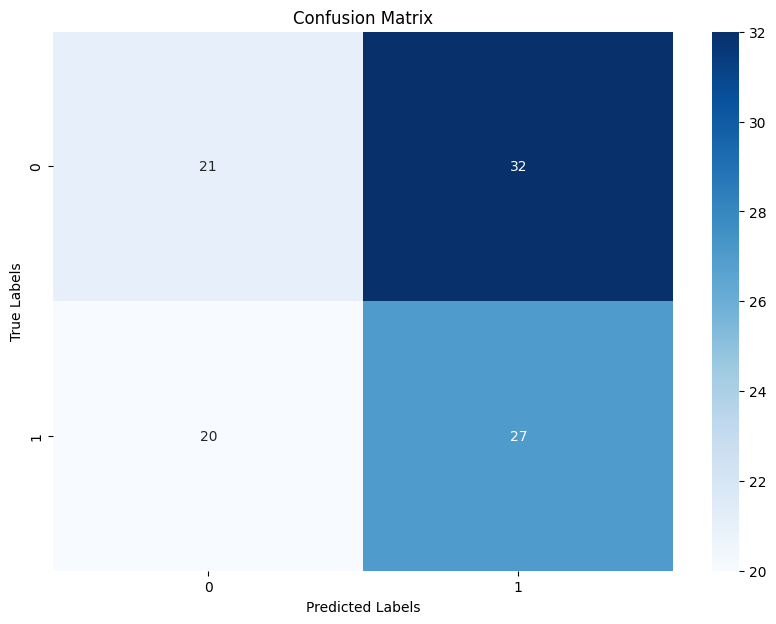

Sample 1:
True Label: 0
Predicted Label: 0

Sample 2:
True Label: 0
Predicted Label: 0

Sample 3:
True Label: 1
Predicted Label: 1



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

def analyze_model_outputs(model, gating_network, experts, data_loader):
    model.eval()
    all_targets = []
    all_predictions = []

    with torch.no_grad():
        for inputs, targets in data_loader:
            gate_outputs = gating_network(inputs)
            expert_outputs = torch.stack([expert(inputs) for expert in experts], dim=1)
            outputs = torch.sum(gate_outputs.unsqueeze(2) * expert_outputs, dim=1)

            _, predictions = torch.max(outputs, 1)
            all_targets.extend(targets.cpu().numpy())
            all_predictions.extend(predictions.cpu().numpy())

    # Calculate the confusion matrix
    cm = confusion_matrix(all_targets, all_predictions)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=True, yticklabels=True)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

    # Display sample outputs
    for i in range(3):  # Displaying 3 sample outputs
        print(f"Sample {i+1}:")
        print(f"True Label: {all_targets[i]}")
        print(f"Predicted Label: {all_predictions[i]}\n")

# Assuming test_loader is your DataLoader instance for testing
analyze_model_outputs(model, gating_network, experts, test_loader)


### Advanced Features for MoE Models

For those looking to push the boundaries of what's possible with Mixture of Experts (MoE) models, this section explores how to implement advanced features. Customizing the model's internals can lead to improved performance and efficiency, especially in complex scenarios where standard approaches fall short. We'll cover three key areas:

1. **Custom Loss Functions**: Tailor the model's learning objective to better suit specific tasks or datasets.
2. **Expert Capacity Constraints**: Ensure a balanced workload among experts and prevent over-reliance on any single expert.
3. **Advanced Routing Mechanisms**: Explore sophisticated strategies for directing inputs to the most appropriate experts.

These customizations offer the opportunity to significantly enhance model performance and adaptability.


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Simplified version of the Expert class
class Expert(nn.Module):
    def __init__(self, input_size, output_size):
        super(Expert, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(input_size, 100),
            nn.ReLU(),
            nn.Linear(100, output_size)
        )

    def forward(self, x):
        return self.network(x)

# Simplified version of the Gating Network class
class GatingNetwork(nn.Module):
    def __init__(self, input_size, num_experts):
        super(GatingNetwork, self).__init__()
        self.network = nn.Linear(input_size, num_experts)

    def forward(self, x):
        return torch.softmax(self.network(x), dim=1)

# Custom Loss Function
class CustomLoss(nn.Module):
    def __init__(self):
        super(CustomLoss, self).__init__()

    def forward(self, outputs, targets):
        return torch.nn.functional.cross_entropy(outputs, targets)

# Creating synthetic data for training
input_size = 10
output_size = 2
num_samples = 100
num_experts = 3
batch_size = 10

inputs = torch.randn(num_samples, input_size)
targets = torch.randint(0, output_size, (num_samples,))

dataset = TensorDataset(inputs, targets)
data_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Initializing the model components
experts = nn.ModuleList([Expert(input_size, output_size) for _ in range(num_experts)])
gating_network = GatingNetwork(input_size, num_experts)
criterion = CustomLoss()
optimizer = optim.Adam(list(experts.parameters()) + list(gating_network.parameters()), lr=0.001)

# Training loop
def train_model(data_loader, gating_network, experts, optimizer, criterion, epochs=10):
    for epoch in range(epochs):
        total_loss = 0.0
        for batch_inputs, batch_targets in data_loader:
            optimizer.zero_grad()
            gate_outputs = gating_network(batch_inputs)
            expert_outputs = torch.stack([expert(batch_inputs) for expert in experts], dim=1)
            outputs = torch.sum(gate_outputs.unsqueeze(2) * expert_outputs, dim=1)
            loss = criterion(outputs, batch_targets)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        print(f'Epoch {epoch+1}, Loss: {total_loss / len(data_loader)}')

train_model(data_loader, gating_network, experts, optimizer, criterion)

# Generate outputs for a batch of inputs
def generate_outputs(gating_network, experts, inputs):
    gate_outputs = gating_network(inputs)
    expert_outputs = torch.stack([expert(inputs) for expert in experts], dim=1)
    outputs = torch.sum(gate_outputs.unsqueeze(2) * expert_outputs, dim=1)
    return outputs

# Generating and displaying outputs for the first batch in the dataset
inputs, _ = next(iter(data_loader))
outputs = generate_outputs(gating_network, experts, inputs)
print("Generated outputs for a batch of inputs:\n", outputs)


Epoch 1, Loss: 0.7093519508838654
Epoch 2, Loss: 0.6914971113204956
Epoch 3, Loss: 0.6814644753932952
Epoch 4, Loss: 0.6701229155063629
Epoch 5, Loss: 0.6633257389068603
Epoch 6, Loss: 0.6537447869777679
Epoch 7, Loss: 0.6461072504520416
Epoch 8, Loss: 0.6388557910919189
Epoch 9, Loss: 0.632922786474228
Epoch 10, Loss: 0.624903678894043
Generated outputs for a batch of inputs:
 tensor([[-0.2180,  0.2182],
        [ 0.0139, -0.3007],
        [-0.2683,  0.4669],
        [-0.3573,  0.2272],
        [ 0.2927, -0.1889],
        [-0.2488,  0.2860],
        [ 0.0184,  0.0956],
        [ 0.2298, -0.0329],
        [ 0.0462,  0.1636],
        [-0.2022,  0.2151]], grad_fn=<SumBackward1>)


### Advanced Mixture of Experts (MoE) Model Implementation

In this advanced section, we explore a sophisticated implementation of the Mixture of Experts (MoE) model, leveraging ensemble techniques and a performance-based gating mechanism. Unlike traditional approaches, this method dynamically selects the best performing model for each input based on historical performance metrics, offering a more nuanced and effective strategy for dealing with diverse datasets.

#### Objectives:

1. **Performance-Based Gating Mechanism**: Implement an advanced gating mechanism that routes inputs to the most appropriate expert model (e.g., Random Forest or XGBoost) based on their validation performance. This approach ensures that each input is handled by the model best suited to predict it accurately, optimizing the overall performance of the MoE model.

2. **Enhanced Interpretability with Verbose Output**: Provide detailed output for each decision made by the gating mechanism, including which model was selected for each input and the corresponding prediction. This verbose output aims to improve the interpretability of the MoE model, offering insights into its internal decision-making process.

3. **Evaluation of Advanced MoE Settings**: Through the lens of a synthetic regression problem, evaluate the effectiveness of this advanced MoE model configuration. By comparing the performance of individual expert models and the combined MoE model, we can assess the benefits of this sophisticated approach.

In [ ]:
import numpy as np
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# Generate a synthetic regression dataset
X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=42)

# Split the dataset into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Train a Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_val_score = cross_val_score(rf, X_val, y_val, cv=5, scoring='neg_mean_squared_error').mean()

# Train an XGBoost model
xgb = XGBRegressor(n_estimators=100, random_state=42)
xgb.fit(X_train, y_train)
xgb_val_score = cross_val_score(xgb, X_val, y_val, cv=5, scoring='neg_mean_squared_error').mean()

print(f"Validation MSE of RF: {rf_val_score:.4f}, XGBoost: {xgb_val_score:.4f}")

# Advanced Gating Mechanism based on cross-validation performance
def choose_model(x):
    # Using validation MSE to determine the model confidence
    if abs(rf_val_score) < abs(xgb_val_score):
        return 'rf', rf.predict(x.reshape(1, -1))[0]
    else:
        return 'xgb', xgb.predict(x.reshape(1, -1))[0]

# Verbose output for decision making and model predictions on the test set
test_predictions = []
for x in X_test:
    chosen_model, prediction = choose_model(x)
    test_predictions.append(prediction)
    print(f"Input features led to choosing {chosen_model.upper()} model with prediction: {prediction:.4f}")

# Evaluate the MoE model on the test set
mse = mean_squared_error(y_test, test_predictions)
print(f'\nOverall Test Mean Squared Error: {mse:.4f}')


Validation MSE of RF: -12794.9534, XGBoost: -12822.0811
Input features led to choosing RF model with prediction: -87.8376
Input features led to choosing RF model with prediction: -21.0924
Input features led to choosing RF model with prediction: -104.1470
Input features led to choosing RF model with prediction: 50.8432
Input features led to choosing RF model with prediction: -143.6869
Input features led to choosing RF model with prediction: -118.9923
Input features led to choosing RF model with prediction: -24.3022
Input features led to choosing RF model with prediction: 70.5284
Input features led to choosing RF model with prediction: 145.5288
Input features led to choosing RF model with prediction: 51.5336
Input features led to choosing RF model with prediction: -255.8665
Input features led to choosing RF model with prediction: 210.4750
Input features led to choosing RF model with prediction: 58.0797
Input features led to choosing RF model with prediction: 138.2587
Input features led t